### Stock Market Prediction And Forecasting Using Stacked LSTM


**The data I have taken from tiingo is from 2019-12-13 00:00:00+00:00 to 2024-12-10 00:00:00+00:00 and after 2022-07-15 00:00:00+00:00 from 2235.55 the clsoing stock price has decreased to 109.03 and went upto 185.17 only at 2024-12-10 00:00:00+00:00. It's abrupt change.**


In [1]:
### Keras and Tensorflow >2.0
!pip install pandas_datareader

In [2]:
### Data Collection
import pandas_datareader as pdr
key=" "     

*I am not showing the key here because I have used that for my personal use*

In [3]:
df = pdr.get_data_tiingo('GOOGL', api_key=key)

C:\Users\91630\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('GOOGLE.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('GOOGLE.csv')


In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2019-12-13 00:00:00+00:00,1346.87,1351.35,1341.66,1347.90,1658684,67.099759,67.322949,66.840202,67.151073,33173680,0.0,1.0
1,GOOGL,2019-12-16 00:00:00+00:00,1360.70,1363.53,1350.61,1355.00,1406457,67.788756,67.929744,67.286082,67.504788,28129140,0.0,1.0
2,GOOGL,2019-12-17 00:00:00+00:00,1354.89,1364.33,1350.77,1362.41,1648549,67.499308,67.969600,67.294053,67.873947,32970980,0.0,1.0
3,GOOGL,2019-12-18 00:00:00+00:00,1351.91,1359.43,1350.46,1357.00,1166733,67.350847,67.725486,67.278610,67.604426,23334660,0.0,1.0
4,GOOGL,2019-12-19 00:00:00+00:00,1356.44,1357.53,1348.75,1351.91,1521082,67.576527,67.630830,67.193419,67.350847,30421640,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,GOOGL,2024-12-04 00:00:00+00:00,174.37,174.91,171.06,171.145,31615137,174.171367,174.710752,170.865138,170.950041,31615137,0.0,1.0
1252,GOOGL,2024-12-05 00:00:00+00:00,172.64,176.06,172.33,175.360,21356243,172.443338,175.859442,172.133691,175.160239,21356243,0.0,1.0
1253,GOOGL,2024-12-06 00:00:00+00:00,174.71,175.08,171.86,172.030,21462393,174.510980,174.880558,171.664226,171.834033,21462393,0.0,1.0
1254,GOOGL,2024-12-09 00:00:00+00:00,175.37,176.26,173.65,173.960,25389631,175.370000,176.260000,173.650000,173.960000,25389631,0.2,1.0
1255,GOOGL,2024-12-10 00:00:00+00:00,185.17,186.36,181.05,182.845,54813022,185.170000,186.360000,181.050000,182.845000,54813022,0.0,1.0


In [9]:
##I am choosing close column We can do it for other too but here I am doing fot close 
df1=df.reset_index()['close']

In [11]:
df1

0       1346.87
1       1360.70
2       1354.89
3       1351.91
4       1356.44
         ...   
1251     174.37
1252     172.64
1253     174.71
1254     175.37
1255     185.17
Name: close, Length: 1256, dtype: float64

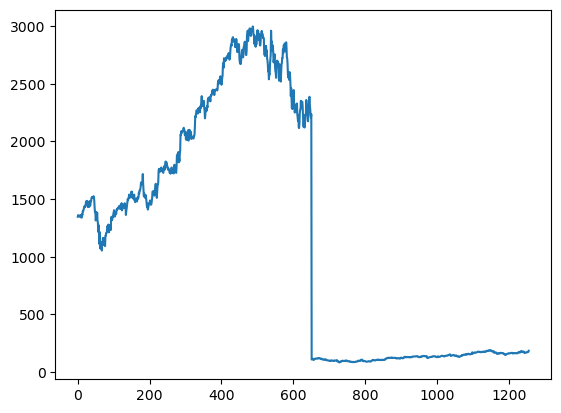

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

**I am getting like this plot beacuse the data I have taken from tiingo is from 2019-12-13 00:00:00+00:00
to 2024-12-10 00:00:00+00:00 and after 2022-07-15 00:00:00+00:00 from 2235.55 the clsoing stock price has decreased to 109.03
and went upto 185.17 only at 2024-12-10 00:00:00+00:00. It's abrupt change.** 

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [13]:
import numpy as np

In [14]:
df1

0       1346.87
1       1360.70
2       1354.89
3       1351.91
4       1356.44
         ...   
1251     174.37
1252     172.64
1253     174.71
1254     175.37
1255     185.17
Name: close, Length: 1256, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.43367406]
 [0.43842119]
 [0.43642692]
 ...
 [0.03133174]
 [0.03155828]
 [0.03492212]]


In [17]:
##splitting dataset into train and test split
##Here normal train test splitting will cause problems beacuse here the data ordering important we should take care of that
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(816, 440)

In [21]:
train_data

array([[4.33674065e-01],
       [4.38421194e-01],
       [4.36426919e-01],
       [4.35404038e-01],
       [4.36958954e-01],
       [4.35167196e-01],
       [4.34964680e-01],
       [4.32836538e-01],
       [4.39028744e-01],
       [4.36341107e-01],
       [4.31216405e-01],
       [4.31106565e-01],
       [4.41160318e-01],
       [4.38702657e-01],
       [4.51159151e-01],
       [4.50232379e-01],
       [4.53640838e-01],
       [4.58703756e-01],
       [4.61851346e-01],
       [4.65651108e-01],
       [4.62410841e-01],
       [4.65366212e-01],
       [4.69128217e-01],
       [4.79205997e-01],
       [4.80143066e-01],
       [4.80699129e-01],
       [4.80980593e-01],
       [4.74623628e-01],
       [4.62802145e-01],
       [4.69244922e-01],
       [4.71373063e-01],
       [4.70532104e-01],
       [4.63162556e-01],
       [4.80263203e-01],
       [4.67497786e-01],
       [4.67717465e-01],
       [4.77987465e-01],
       [4.79065265e-01],
       [4.89208263e-01],
       [4.89688811e-01],


In [22]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train)

[[0.43367406 0.43842119 0.43642692 ... 0.43441205 0.43317979 0.44136627]
 [0.43842119 0.43642692 0.43540404 ... 0.43317979 0.44136627 0.44653559]
 [0.43642692 0.43540404 0.43695895 ... 0.44136627 0.44653559 0.45314313]
 ...
 [0.0048501  0.00536498 0.00450685 ... 0.003508   0.00401601 0.00358008]
 [0.00536498 0.00450685 0.00567733 ... 0.00401601 0.00358008 0.00371395]
 [0.00450685 0.00567733 0.00595193 ... 0.00358008 0.00371395 0.00305148]]


In [25]:
print(y_train)

[4.46535591e-01 4.53143128e-01 4.43391434e-01 4.34175208e-01
 4.37103119e-01 4.42663747e-01 4.46823920e-01 4.43123700e-01
 4.55055023e-01 4.54227794e-01 4.56455477e-01 4.59246089e-01
 4.58871948e-01 4.58171720e-01 4.63416560e-01 4.63879945e-01
 4.66433715e-01 4.65383374e-01 4.56819321e-01 4.65647676e-01
 4.68400530e-01 4.69787254e-01 4.74119052e-01 4.52563038e-01
 4.56345638e-01 4.59029842e-01 4.67861630e-01 4.69945149e-01
 4.63622509e-01 4.60368512e-01 4.69299841e-01 4.73871913e-01
 4.63135096e-01 4.66018384e-01 4.39052771e-01 4.50939472e-01
 4.58106503e-01 4.66327308e-01 4.75914243e-01 4.86115592e-01
 4.82775783e-01 4.87471425e-01 4.92640749e-01 4.99625859e-01
 4.90433660e-01 4.93395896e-01 4.92029767e-01 4.91356999e-01
 4.92019469e-01 5.08148723e-01 5.05430194e-01 5.08495404e-01
 4.91985144e-01 4.89053801e-01 4.96337537e-01 4.87488587e-01
 4.94305505e-01 4.99406180e-01 4.82099583e-01 4.80318123e-01
 4.77070991e-01 4.79058400e-01 4.87934810e-01 4.85676234e-01
 4.85144199e-01 4.795561

In [26]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
## we Need to add one more dimension so we are adding 1 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\91630\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - loss: 0.2356 - val_loss: 0.0172
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0225 - val_loss: 0.0137
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0173 - val_loss: 0.0027
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0107 - val_loss: 2.6389e-05
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0095 - val_loss: 4.0670e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0080 - val_loss: 2.7402e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0119 - val_loss: 2.5080e-05
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0086 - val_loss: 4.6011e-06
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0071 - val_loss: 5.9423e-06
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0082 - val_loss: 9.7794e-06
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0090 - val_loss: 2.2730e-05
Epoch 12/

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.16.1'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1994.0118641288402

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

149.89563630597948

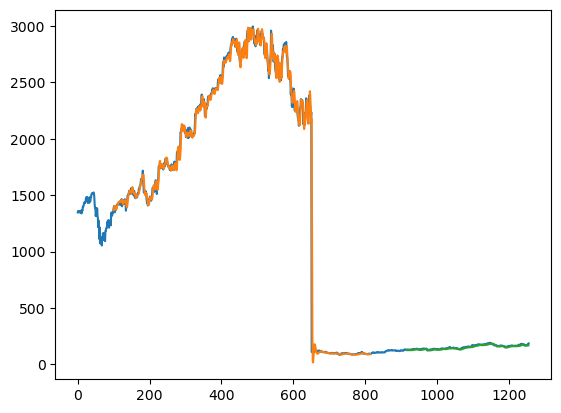

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Here also the reason of getting propper result is the same I guess underfitting of model beacuse of the data not fitting properly. After the abrupt change in data**

In [42]:
len(test_data)

440

In [43]:
###To predict the next 30 days data I have to take start with last 100 days data 340


x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.03372074663444705,
 0.03376193647154125,
 0.03061777890668442,
 0.02878139866956826,
 0.028685289049681803,
 0.0295537081150844,
 0.02981457708334763,
 0.030243637886412156,
 0.029975903945299892,
 0.028568584511248253,
 0.026025112070681755,
 0.025695593373928197,
 0.025918704991521754,
 0.02697934329669726,
 0.02754227107031791,
 0.02706858794373468,
 0.027710462905119207,
 0.02640955055022757,
 0.026728771787707578,
 0.02729856453417727,
 0.02857201699767277,
 0.028747073805323098,
 0.02829055311086244,
 0.02758689339383663,
 0.02821160592309857,
 0.02839696019002244,
 0.02788895219919405,
 0.027260807183507582,
 0.02689353113608435,
 0.027442728964006943,
 0.0253763721364482,
 0.025064015871817218,
 0.025335182299354005,
 0.023165850879059764,
 0.022407271379241693,
 0.02239010894711911,
 0.023248230553248157,
 0.024459898261102377,
 0.025410697000693365,
 0.025616646186164334,
 0.02604913947565337,
 0.026217331310454665,
 0.027017100647366933,
 0.027514811178921787,
 0.02691755

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02963603]
101
1 day input [0.03376194 0.03061778 0.0287814  0.02868529 0.02955371 0.02981458
 0.03024364 0.0299759  0.02856858 0.02602511 0.02569559 0.0259187
 0.02697934 0.02754227 0.02706859 0.02771046 0.02640955 0.02672877
 0.02729856 0.02857202 0.02874707 0.02829055 0.02758689 0.02821161
 0.02839696 0.02788895 0.02726081 0.02689353 0.02744273 0.02537637
 0.02506402 0.02533518 0.02316585 0.02240727 0.02239011 0.02324823
 0.0244599  0.0254107  0.02561665 0.02604914 0.02621733 0.0270171
 0.02751481 0.02691756 0.02706859 0.02679399 0.02721962 0.02763838
 0.02829055 0.02868186 0.02829399 0.02829399 0.02870588 0.02730543
 0.02778598 0.02692099 0.02699651 0.02739467 0.02798506 0.02815669
 0.02805371 0.02728827 0.02745646 0.02767957 0.02804685 0.02723678
 0.02721618 0.02809147 0.02858918 0.0296052  0.03124592 0.03009604
 0.03015783 0.02945417 0.02962579 0.03194958 0.03340496 0.03258116
 0.03326766 0.03370358 0.03276308 0.03163036 0.03056972 0.03153425
 0.03250221 0.03176766 0.02890154 0

9 day output [[0.02807077]]
10 day input [0.02602511 0.02569559 0.0259187  0.02697934 0.02754227 0.02706859
 0.02771046 0.02640955 0.02672877 0.02729856 0.02857202 0.02874707
 0.02829055 0.02758689 0.02821161 0.02839696 0.02788895 0.02726081
 0.02689353 0.02744273 0.02537637 0.02506402 0.02533518 0.02316585
 0.02240727 0.02239011 0.02324823 0.0244599  0.0254107  0.02561665
 0.02604914 0.02621733 0.0270171  0.02751481 0.02691756 0.02706859
 0.02679399 0.02721962 0.02763838 0.02829055 0.02868186 0.02829399
 0.02829399 0.02870588 0.02730543 0.02778598 0.02692099 0.02699651
 0.02739467 0.02798506 0.02815669 0.02805371 0.02728827 0.02745646
 0.02767957 0.02804685 0.02723678 0.02721618 0.02809147 0.02858918
 0.0296052  0.03124592 0.03009604 0.03015783 0.02945417 0.02962579
 0.03194958 0.03340496 0.03258116 0.03326766 0.03370358 0.03276308
 0.03163036 0.03056972 0.03153425 0.03250221 0.03176766 0.02890154
 0.02791641 0.0289084  0.02941298 0.02945073 0.02935462 0.03022648
 0.03017499 0.0312150

17 day output [[0.02590841]]
18 day input [0.02672877 0.02729856 0.02857202 0.02874707 0.02829055 0.02758689
 0.02821161 0.02839696 0.02788895 0.02726081 0.02689353 0.02744273
 0.02537637 0.02506402 0.02533518 0.02316585 0.02240727 0.02239011
 0.02324823 0.0244599  0.0254107  0.02561665 0.02604914 0.02621733
 0.0270171  0.02751481 0.02691756 0.02706859 0.02679399 0.02721962
 0.02763838 0.02829055 0.02868186 0.02829399 0.02829399 0.02870588
 0.02730543 0.02778598 0.02692099 0.02699651 0.02739467 0.02798506
 0.02815669 0.02805371 0.02728827 0.02745646 0.02767957 0.02804685
 0.02723678 0.02721618 0.02809147 0.02858918 0.0296052  0.03124592
 0.03009604 0.03015783 0.02945417 0.02962579 0.03194958 0.03340496
 0.03258116 0.03326766 0.03370358 0.03276308 0.03163036 0.03056972
 0.03153425 0.03250221 0.03176766 0.02890154 0.02791641 0.0289084
 0.02941298 0.02945073 0.02935462 0.03022648 0.03017499 0.03121503
 0.03062121 0.03133174 0.03155828 0.03492212 0.02963603 0.02992519
 0.02996074 0.0298096

25 day output [[0.02379768]]
26 day input [0.02788895 0.02726081 0.02689353 0.02744273 0.02537637 0.02506402
 0.02533518 0.02316585 0.02240727 0.02239011 0.02324823 0.0244599
 0.0254107  0.02561665 0.02604914 0.02621733 0.0270171  0.02751481
 0.02691756 0.02706859 0.02679399 0.02721962 0.02763838 0.02829055
 0.02868186 0.02829399 0.02829399 0.02870588 0.02730543 0.02778598
 0.02692099 0.02699651 0.02739467 0.02798506 0.02815669 0.02805371
 0.02728827 0.02745646 0.02767957 0.02804685 0.02723678 0.02721618
 0.02809147 0.02858918 0.0296052  0.03124592 0.03009604 0.03015783
 0.02945417 0.02962579 0.03194958 0.03340496 0.03258116 0.03326766
 0.03370358 0.03276308 0.03163036 0.03056972 0.03153425 0.03250221
 0.03176766 0.02890154 0.02791641 0.0289084  0.02941298 0.02945073
 0.02935462 0.03022648 0.03017499 0.03121503 0.03062121 0.03133174
 0.03155828 0.03492212 0.02963603 0.02992519 0.02996074 0.02980967
 0.02955481 0.0292566  0.02894908 0.0286471  0.02835461 0.02807077
 0.02779322 0.0275197

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
import matplotlib.pyplot as plt

In [49]:
len(df1)

1256

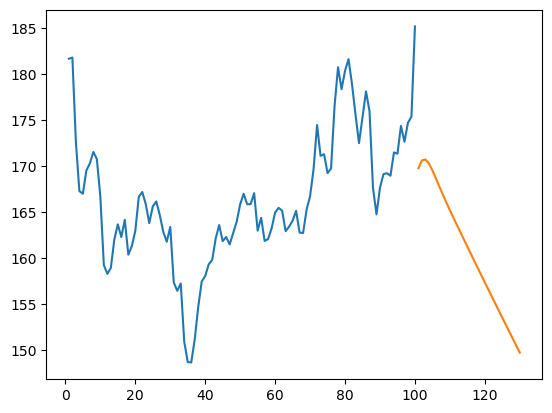

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

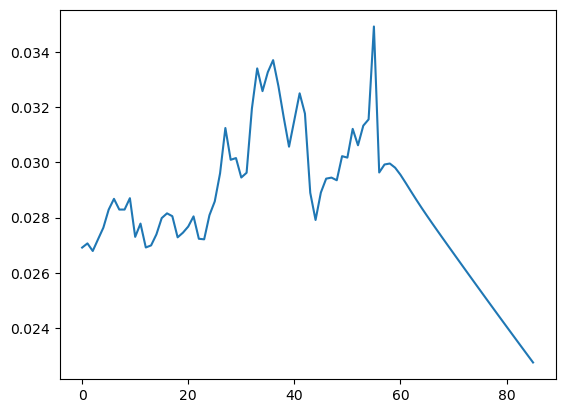

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

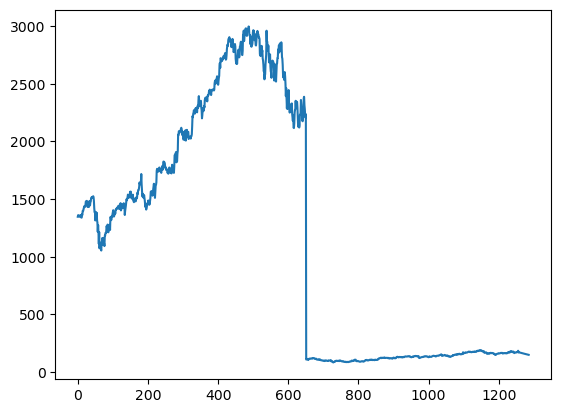

In [55]:
plt.plot(df3)

**This Kind of plot is due to the abrupt change in data after a certain point.**